# Tweet Sentiment Extraction
Extract support phrases for sentiment labels

Integrantes:
* Maria Camila Gómez
* Juan Esteban Guevara Montoya

## Descripción del problema

* Dado un tweet la idea es extraer la parte del tweet que ejemplifica un determinado sentimiento (Postivo, Negativo y Neutral)


Ejemplos:

input:
* Sooo SAD I will miss you here in San Diego!!!	- negative
* My boss is bullying me... - negative
* Sons of ****, why couldn`t they put them on the releases we already bought - negative

output :
* Sooo SAD
* Bullying me
* Sons of ****


In [96]:
import numpy as np
import pandas as pd
import tensorflow as tf
from Tokanizer import TOC
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

path = '/home/jueguevaramo/Documents/Data_sets/Kaggle/'
path = path + 'Tweet_NLP/tweet-sentiment-extraction/train.csv'
data = pd.read_csv(path)

data['text'] = data['text'].astype('str')
data['selected_text'] = data['selected_text'].astype('str')


## Nuestros acercamientos al problema:

###  1 Predecir la posición de 'Comienzo' y de 'finalización'





In [73]:
data_prueba = data.iloc[8:30,:]

data_prueba['text_seq'] = data_prueba.text.apply(lambda x: TOC(x).from_tweet())
data_prueba['selected_text_seq'] =data_prueba.selected_text.apply(lambda x:
                                                     TOC(x).from_tweet())
index = 19
print('='*100)
print('Sentimiento:\n')
print(data_prueba.iloc[index,].sentiment)
print('\n'+'='*100)
print('\n',data_prueba.text_seq.iloc[index,])
a = len(data_prueba.text_seq.iloc[index,])
print('\n',np.eye(a)[5])
print('\n',np.eye(a)[7])
print('\n',data_prueba.selected_text_seq.iloc[index,])
print('\n'+'='*100)                                                 

Sentimiento:

negative


 ['On', 'the', 'way', 'to', 'Malaysia', '...', 'no', 'internet', 'access', 'to', 'Twit']

 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]

 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]

 ['.', 'no', 'internet']



### 2. Named Entity Recognition

In [81]:
index = 19
print('='*100)
print('Sentimiento:\n')
print(data_prueba.iloc[index,].sentiment)
print('\n'+'='*100)
print('\n',data_prueba.text_seq.iloc[index,])
a = len(data_prueba.text_seq.iloc[index,])
print('\n',data_prueba.selected_text_seq.iloc[index,])
print('\n','IOB format:')
print('\n',['O','O','O','O','O','B-NEG','I-NEG','E-NEG','O','O','O'])
print('\n'+'='*100)      


Sentimiento:

negative


 ['On', 'the', 'way', 'to', 'Malaysia', '...', 'no', 'internet', 'access', 'to', 'Twit']

 ['.', 'no', 'internet']

 IOB format:

 ['O', 'O', 'O', 'O', 'O', 'B-NEG', 'I-NEG', 'E-NEG', 'O', 'O', 'O']



In [97]:
data['text_seq'] = data.text.apply(lambda x: TOC(x).from_tweet())
data['selected_text_seq'] = data.selected_text.apply(lambda x:
                                                     TOC(x).from_tweet())
data['len_text'] = data.text_seq.apply(lambda x: len(x))
data['len_selected_text'] = data.selected_text_seq.apply(lambda x: len(x))
data['cant'] = data.len_selected_text/data.len_text


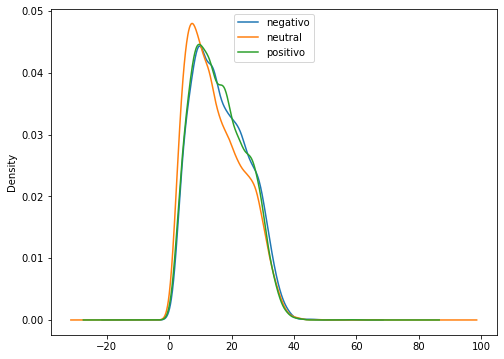

In [137]:
fig, ax = plt.subplots(figsize=(8,6))
g = data[['sentiment','len_text']].groupby('sentiment')
axes = g.plot(kind='kde' ,ax = ax)
ax.legend(['negativo','neutral','positivo'], loc='upper center')

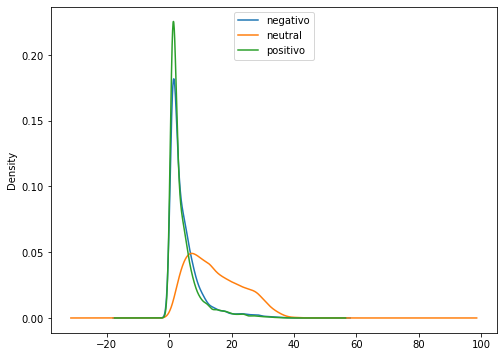

In [139]:
fig, ax = plt.subplots(figsize=(8,6))
g = data[['sentiment','len_selected_text']].groupby('sentiment')
axes = g.plot(kind='kde' ,ax = ax)
ax.legend(['negativo','neutral','positivo'], loc='upper center')

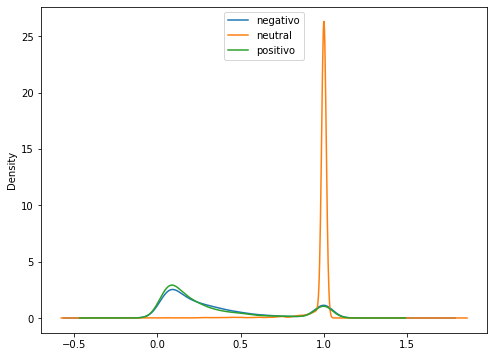

In [140]:
fig, ax = plt.subplots(figsize=(8,6))
g = data[['sentiment','cantb']].groupby('sentiment')
axes = g.plot(kind='kde' ,ax = ax)
ax.legend(['negativo','neutral','positivo'], loc='upper center')

In [144]:
data[data.sentiment == 'neutral'].sample(n=5)

,textID,text,selected_text,sentiment,text_seq,selected_text_seq,len_text,len_selected_text,cant
17314,ddd37d319b,Back then I didn`t know why you were misunders...,Back then I didn`t know why you were misunders...,neutral,"[Back, then, I, didn, `, t, know, why, you, we...","[Back, then, I, didn, `, t, know, why, you, we...",32,32,1.0
7020,85a656ef9f,will be doing all the chores just for her mama,will be doing all the chores just for her mama,neutral,"[will, be, doing, all, the, chores, just, for,...","[will, be, doing, all, the, chores, just, for,...",10,10,1.0
14219,08e1040424,I`m up way past my bed time. gonna catch sum ...,I`m up way past my bed time. gonna catch sum ...,neutral,"[I, `, m, up, way, past, my, bed, time, ., gon...","[I, `, m, up, way, past, my, bed, time, ., gon...",15,15,1.0
13597,338aa856ea,I wasn`t going to go out tonight but looks lik...,I wasn`t going to go out tonight but looks lik...,neutral,"[I, wasn, `, t, going, to, go, out, tonight, b...","[I, wasn, `, t, going, to, go, out, tonight, b...",21,21,1.0
13065,cad66369cd,i cant believe you are closing 2moro and ive ...,i cant believe you are closing 2moro and ive n...,neutral,"[i, cant, believe, you, are, closing, 2moro, a...","[i, cant, believe, you, are, closing, 2moro, a...",27,27,1.0
